**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

![Significance](../Resources/significance.jpeg)

# Inferences about one or two populations

At the heart of many basic scientific inquiries is the simple question "Is A different from B?" The scientific notation for this question is:

-   H0: Group A is not different from group B.
-   H1: Group A is different from group B.

More formally, one would say:

1.  $H_{0}: \bar{A} = \bar{B}$ vs. the alternative hypothesis that $H_{a}: \bar{A} \neq \bar{B}$.
2.  $H_{0}: \bar{A} \leq \bar{B}$ vs. the alternative hypothesis that $H_{a}: \bar{A} > \bar{B}$.
3.  $H_{0}: \bar{A} \geq \bar{B}$ vs. the alternative hypothesis that $H_{a}: \bar{A} < \bar{B}$.

> *NOTE:* Hypothesis 1 is a two-sided *t*-test and hypotheses 2 and 3 are one-sided tests.

<!-- AJS to insert more about frequentist probability, p-values and significance testing in here. -->

Biologists typically define the probability of one in twenty (0.05) as the cut-off level to reject the null hypothesis.

## What are probabilities?

The *P*-value (the significance level, $\alpha$) is the probability of finding the observed (or measured) outcome to be more extreme (*i.e.* very different) than that suggested by the null hypothesis ($H_{0}$). Typically, biologists set the *P*-value at $\alpha \leq 0.05$---in other words, the measured outcome of our experiment only has a 1 in 20 chance of being the same as that of the reference (or control) group. So, when the *P*-value is $\leq$ 0.05, for example, we say that there is a very good probability that our experimental treatment resulted in an outcome that is very different (we say statistically significantly different) from the measurement obtained from the group to which the treatment had not been applied---in this case we do not accept $H_{0}$ and by necessity $H_{1}$ becomes true.

The choice of *P*-value at which we reject $H_{0}$ is arbitrary and exists by convention only. Traditionally, the 5% cut-off (*i.e.* less than 1 in 20 chance of being wrong or $P \leq 0.05$) is used in biology, but sometimes the threshold is set at 1% or 0.1% (0.01 or 0.001, respectively), particularly in the biomedical sciences where avoiding fasle positives or negatives could be a public health concern. However, more and more biologists shy away from the *P*-value as they argue that it can give a false sense of security.

We generally refer to $P \leq 0.05$ as being statistically significant. Statistically highly significant is seen at as $P \leq 0.001$. In the first instance there is a less than 1 in 20 chance that our experimental sample is not different from the reference group, and in the second instance there is a less than 1 in a 1000 chance tat they are the same. This says something about error rates: the $H_{0}$ may in fact be falsely accepted or rejected. A Type I error is the false rejection of the null hypothesis (*i.e.* in reality we should not be rejecting it, but the *P*-value suggests that we must). A Type II error, on the other hand, is the false acceptance of the null hypothesis (*i.e.* the P-value suggests we should not reject the $H_{0}$, but in fact we must). When a statistical test results in a *P*-value of, say, $P \leq 0.05$ we would conclude that our experimental sample is statistically different from the reference group, but probabilistically there is a 1 in 20 change that this outcome is incorrect (*i.e.* the difference was arrived at by random chance only).

**To conclude, when** $P \gt 0.05$ there is a lack of evidence to suggest that our experiment has had an influential effect of the hypothesised outcome. When $P \leq 0.05$, however, there is a good probability that the experiment (etc.) has had an effect.

## Is there a difference between two groups?

To answer this fundamental question one often uses a *t*-test. There are several variations of *t*-tests, depending on the nature of our samples and the type of question being asked:

-   **One-sample *t*-tests:** only one sample set of data that we wish to compare against a known population mean:

    -   one-sided one-sample *t*-tests
    -   two-sided one-sample *t*-tests

-   **Two-sample *t*-tests:** the means of two groups are compared against each other:

    -   independent sample *t*-tests

        -   one-sided two-sample *t*-tests
        -   two-sided two-sample *t*-tests

    -   paired sample *t*-tests

        -   one-sided
        -   two-sided

Before we cover each of these, we need to understand some of the assumptions behind *t*-tests. We shall cover that next.

## Assumptions

![Walberg_assumptions](../Resources/wahlberg_distribution.jpeg)

Irrespective of the kind of *t*-test, we have to make a couple of important assumptions that are *not* guaranteed to be true. In fact, these assumptions are often violated because real data, especially biological data, are messy. In order to use a *t*-test to determine if a significant difference between two sample sets of data exists we must first establish that:

-   the dependent variable must be continuous (i.e. it is measured at the interval or ratio level),
-   the observations in the groups being compared are independent of each other,
-   the data are **normally distributed**, and
-   that the data are **homoscedastic**, and in particular, that there are no outliers.

<!-- Insert table showing what the consequences of not meeting the assumptions are. -->

<!-- Then a and a table showing which tests may be used for those circumstances -->

### Normality

Remember from Chapter 5 what a normal distribution is/looks like? Let's have a peek below to remind ourselves:

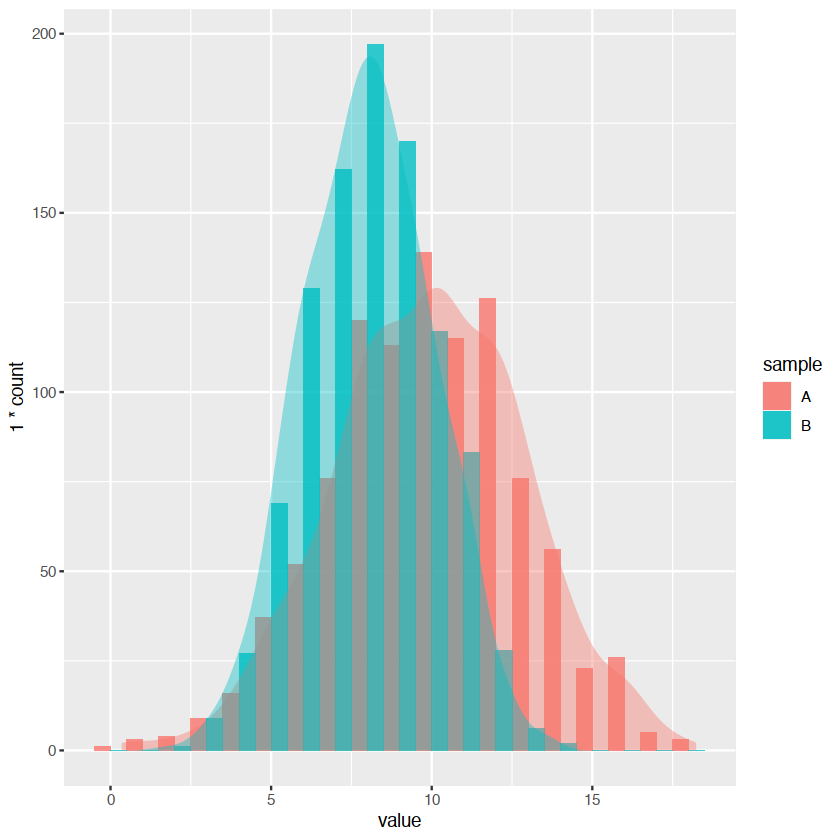

In [1]:
suppressMessages(library(tidyverse))

# Random normal data
set.seed(666)
r_dat <- data.frame(dat = c(rnorm(n = 1000, mean = 10, sd = 3),
                            rnorm(n = 1000, mean = 8, sd = 2)),
                    sample = c(rep("A", 1000), rep("B", 1000)))

# Create histogram
h <- ggplot(data = r_dat, aes(x = dat, fill = sample)) +
  geom_histogram(position = "dodge", binwidth = 1, alpha = 0.8) +
  geom_density(aes(y = 1*..count.., fill = sample), colour = NA, alpha = 0.4) +
  labs(x = "value")
h

Whereas histograms may be a pretty way to check the normality of our data, there is actually a statistical test for this, which is preferable to a visual inspection alone. But remember that you should *always* visualise your data before performing any statistics on them. To check the normality of the data we use the Shapiro-Wilk test. This test produces a $W$ value and a *p*-value. We are only interested in the *p*-value as this is how we are to determine the normality of the data. The Shapiro--Wilk test tests the null hypothesis that a sample $x_{1},..., x_{n}$ comes from a normally distributed population. i.e. that the normality *does not* differ significantly from normal. If the *p*-value is **above** 0.05 we may assume the data to be normally distributed. In order to demonstrate what the output of `shapiro.test()` looks like we will run it on all of the random data we generated.

In [2]:
shapiro.test(r_dat$dat)


	Shapiro-Wilk normality test

data:  r_dat$dat
W = 0.9942, p-value = 4.649e-07


Note that this shows that the data are *not* normally distributed. This is because we have incorrectly run this function simultaneously on two different samples of data. To perform this test correctly, and in the tidy way, we need to select only the second piece of information from the `shapiro.test()` output and ensure that it is presented as a numeric value:

In [32]:
# We use the square bracket notation to select only the p-value;
# had we used `[1]` we'd have gotten W
r_dat %>% 
  group_by(sample) %>% 
  summarise(norm_dat = as.numeric(shapiro.test(dat)[2]))

sample,norm_dat
<chr>,<dbl>
A,0.3751038
B,0.4606697


Now we see that our two sample sets are indeed normally distributed.

What if we find that the data are not normally distributed? Although there are many options, the easiest is to perform a Wilcoxon Rank Sum test, which is the non-parametric equivalent to a *t*-test (see Section X). Another option is to transform the data (Chapter 11).

### Homoscedasticity

Besides requiring that our data are normally distributed, we must also ensured that they are homoscedastic. This word means that the scedasticity (variance) of things are homogeneous (similar). In practical terms this means that the variance of the samples we are comparing should not be more than two to four times greater than one another. In R, we use the function `var()` to check the variance in a sample:

In [4]:
r_dat %>% 
  group_by(sample) %>% 
  summarise(sample_var = var(dat))

sample,sample_var
<chr>,<dbl>
A,8.718174
B,3.974726


Above we see that the variance of our two samples are homoscedastic because the variance of one is not more than two to four times greater than the other.

What if our data are not equal in their variances? This is easier to fix as the solution is built right into the *t*-test function; all we need to do is to perform Welch Two Sample *t*-test (the default) in the `t.test()` function that we shall use below. If the variances are equal, we simply perform a normal Student's *t*-test by setting the argument `var.equal = TRUE` in the function call (see below).

### Two for one

Because these two assumptions of normality and homoscedasticty are performed in tandem with one another, it is helpful to have a function that checks for both simultaneously. Below we see how just such a function would be written:

In [5]:
two_assum <- function(x) {
  x_var <- var(x)
  x_norm <- as.numeric(shapiro.test(x)[2])
  result <- c(x_var, x_norm)
  return(result)
}

To use our new function in a tidy way we use the following code:

In [6]:
r_dat %>% 
  group_by(sample) %>% 
  summarise(sample_var = two_assum(dat)[1],
            sample_norm = two_assum(dat)[2])

sample,sample_var,sample_norm
<chr>,<dbl>,<dbl>
A,8.718174,0.3751038
B,3.974726,0.4606697


Do these data meet our assumptions? How do we know this?

Once we have tested our assumptions we may perform a *t*-test to ascertain whether or not our samples are significantly different from one another. The base R function for this is `t.test()`; however, by utilising the **`ggpubr`** package we gain access to `compare_means()`, which allows us to perform any sort of test that compares sample sets of data and outputs the results as a dataframe. We will see throughout this and the following chapters why this is so useful.

In [7]:
library(ggpubr)

## One-sample *t*-tests

Generally when we use a *t*-test it will be a two-sample *t*-test (see below). Occasionally, however, we may have only one sample set of data that we wish to compare against a known population mean, which is generally denoted as $\mu$, or `mu` in the function call to the *t*-test in R:

In [34]:
# Create a single sample of random normal data
set.seed(666)
r_one <- data.frame(dat = rnorm(n = 20, mean = 20, sd = 5),
                    sample = "A")

# Check normality
shapiro.test(r_one$dat)

# No variance to compare
# ...

# Compare random data against a population mean of 20
t.test(r_one$dat, mu = 20)

# Compare random data against a population mean of 30
t.test(r_one$dat, mu = 30)


	Shapiro-Wilk normality test

data:  r_one$dat
W = 0.94911, p-value = 0.3538



	One Sample t-test

data:  r_one$dat
t = 0.0048653, df = 19, p-value = 0.9962
alternative hypothesis: true mean is not equal to 20
95 percent confidence interval:
 16.91306 23.10133
sample estimates:
mean of x 
 20.00719 



	One Sample t-test

data:  r_one$dat
t = -6.7596, df = 19, p-value = 1.858e-06
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 16.91306 23.10133
sample estimates:
mean of x 
 20.00719 


What do the results of these two different tests show? Let's visualise these data to get a better understanding.

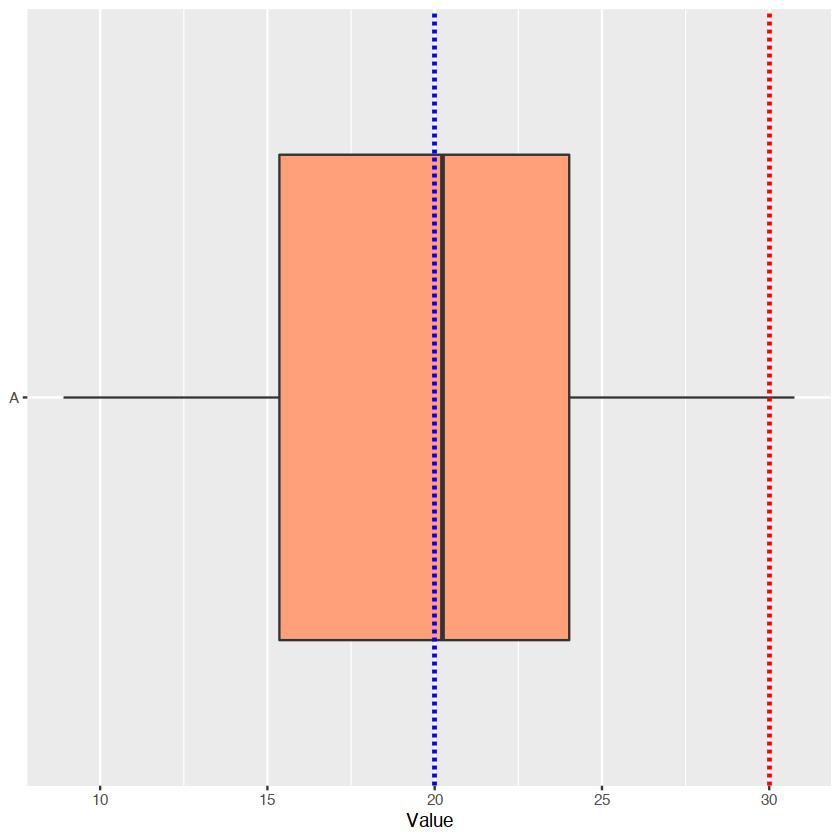

In [9]:
ggplot(data = r_one, aes(y = dat, x = sample)) +
  geom_boxplot(fill = "lightsalmon") +
  # population  mean (mu) = 20
  geom_hline(yintercept = 20, colour = "blue", 
             size = 1, linetype = "dashed") +
  # population  mean (mu) = 30
  geom_hline(yintercept = 30, colour = "red", 
             size = 1, linetype = "dashed") +
  labs(y = "Value", x = NULL) +
  coord_flip()

**Figure:** Boxplot of random normal data with. A hypothetical population mean of 20 is shown as a blue line, with the red line showing a mean of 30.

The boxplot above shows the distribution of our random data against two potential population means. Does this help now to illustrate the results of our one-sample *t*-tests?

### One-sided one-sample *t*-tests

As we may remember from Chapter 5, a distribution has two tails. When we are testing for significance we are generally looking for a result that lays in the far end of either of these tails. Occasionally, however, we may want to know if the result lays specifically in one of the tails. Explicitly the leading or trailing tail. For example, is the mean value of our sample population significantly *greater than* the value $\mu$? Or, is the mean value of our sample population significantly *less than* the value $\mu$? To specify this in R we must add an argument as seen below:

In [35]:
# Check against the trailing tail
t.test(r_one$dat, mu = 30, alternative = "less")

# Check against the leading tail
t.test(r_one$dat, mu = 30, alternative = "greater")


	One Sample t-test

data:  r_one$dat
t = -6.7596, df = 19, p-value = 9.292e-07
alternative hypothesis: true mean is less than 30
95 percent confidence interval:
     -Inf 22.56339
sample estimates:
mean of x 
 20.00719 



	One Sample t-test

data:  r_one$dat
t = -6.7596, df = 19, p-value = 1
alternative hypothesis: true mean is greater than 30
95 percent confidence interval:
 17.451    Inf
sample estimates:
mean of x 
 20.00719 


Are these the results we would have expected? Why does the second test not return a significant result?

<div class="alert alert-block alert-success">
<b>Task:</b> Create a visualisation to graphically demonstrate the outcome of this *t*-test.
</div>
    
### Two-sided one-sample *t*-tests

In R, the default setting for any comparison of means test is that it is two-sided so we do not need to state this explicitly. For the sake of thoroughness let's see how to do this below. Note that the results for the two following tests are identical:

In [11]:
# R assumes we want a to-sided test
t.test(r_one$dat, mu = 30)

# but we can be explicit as we choose
t.test(r_one$dat, mu = 30, alternative = "two.sided")


	One Sample t-test

data:  r_one$dat
t = -6.7596, df = 19, p-value = 1.858e-06
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 16.91306 23.10133
sample estimates:
mean of x 
 20.00719 



	One Sample t-test

data:  r_one$dat
t = -6.7596, df = 19, p-value = 1.858e-06
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 16.91306 23.10133
sample estimates:
mean of x 
 20.00719 


## Two-sample *t*-tests

A two-sample *t*-test is used when we have samples from two different populations that we would like to compare against one another. This is the most common use of a *t*-test. Two sample *t*-tests can accommodate samples with equal variances or samples with unequal variances (as determined by the test for heteroscedasticity that we performed earlier).

In the case of samples that share the same variance we perform a classical *t*-test (otherwise known as Student's *t*-test); the equation to calculate the *t*-statistic is this one:

$$t=\frac{\bar{A}-\bar{B}}{\sqrt{\frac{S^{2}}{n}+\frac{S^{2}}{m}}}$$ $\bar{A}$ and $\bar{B}$ are the means for groups $A$ and $B$, respectively; $n$ and $m$ are the sample sizes of the two sets of samples, respectively; and $S^{2}$ is the pooled variance, which is calculated as:

$$S^{2}=\frac{(n-1)S_{A}^{2}+(m-1)S_{B}^{2} }{n+m-2}$$ The degrees of freedom, $d.f.$, in the equation for the shared variance is $n_{A}+m_{B}-2$.

When variances are unequal we perform the Welch's *t*-test; Welch's *t*-statistics is calculated as per this equation:

$$t=\frac{\bar{A}-\bar{B}}{\sqrt{\frac{S^{2}_{A}}{n}+\frac{S^{2}_{B}}{m}}}$$

Above, $S_{A}$ and $S_{B}$ are the variances of groups $A$ and $B$, respectively (see Section X). The degrees of freedom to use with Welch's *t*-test is obtained using the Welch--Satterthwaite equation as:

$$d.f. = \frac{\left( \frac{S^{2}_{A}}{n}+\frac{S^{2}_{B}}{m} \right)^{2}}{\left( \frac{S^{4}_{A}}{n-1} + \frac{S^{4}_{B}}{m-1} \right)}$$

What do we do with this *t*-statistic? In the olden days we had to calculate the $t$-statistics and the $d.f.$ by hand. These two values, the $d.f.$ and $t$-value had to be read off a table of pre-calculated $t$-values, probabilities and degrees of freedom [as in here](https://home.ubalt.edu/ntsbarsh/Business-stat/StatistialTables.pdf). Luckily, the *t*-test function nowadays does this all automagically. But if you are feeling nostalgic over times that you have sadly never experienced, please calculate the $t$-statistic and the $d.f.$ yourself and give the table a go.

Back to the present day and the wonders of modern technology. Let's generate some new random normal data and test to see if the data belonging to the two groups differ significantly from one-another. First, we apply the *t*-test function as usual:

In [37]:
# Random normal data
set.seed(666)
r_two <- data.frame(dat = c(rnorm(n = 20, mean = 4, sd = 1),
                            rnorm(n = 20, mean = 5, sd = 1)),
                    sample = c(rep("A", 20), rep("B", 20)))

# Perform t-test
# note how we set the `var.equal` argument to TRUE because we know 
# our data has the same SD (they are simulated as such!)
t.test(dat ~ sample, data = r_two, var.equal = TRUE)
# If the variances are not equal, simply set `var.equal` to false
# and a Welch's t-test will be performed


	Two Sample t-test

data:  dat by sample
t = -1.9544, df = 38, p-value = 0.05805
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 -1.51699175  0.02670136
sample estimates:
mean in group A mean in group B 
       4.001438        4.746584 


The first argument we see in `t.test()` is `dat ~ sample`. Usually in R when we see a `~` (tilde) we are creating what is known as a formula. A formula tells R how it should look for interactions between data and factors. For example `Y ~ X` reads: $Y$ as a function of $X$. In our code above we see `dat ~ sample`. This means we are telling R that the *t*-test we want it to perform is when the `dat` column is a function of the `sample` column. In plain English we are dividing up the `dat` column into the two different samples we have, and then running a *t*-test on these samples. Another way of stating this is that the value of `dat` depends on the grouping it belong to (`A` or `B`). We will see this same formula notation cropping up later under ANOVAs, linear models, etc.

Now that we have seen the nitty gritty of how a *t*-test is meant to work, click [here]() to watch a visualisation that demonstrates how the relationships between two different sample sets (based on their mean and variance) influence the results.


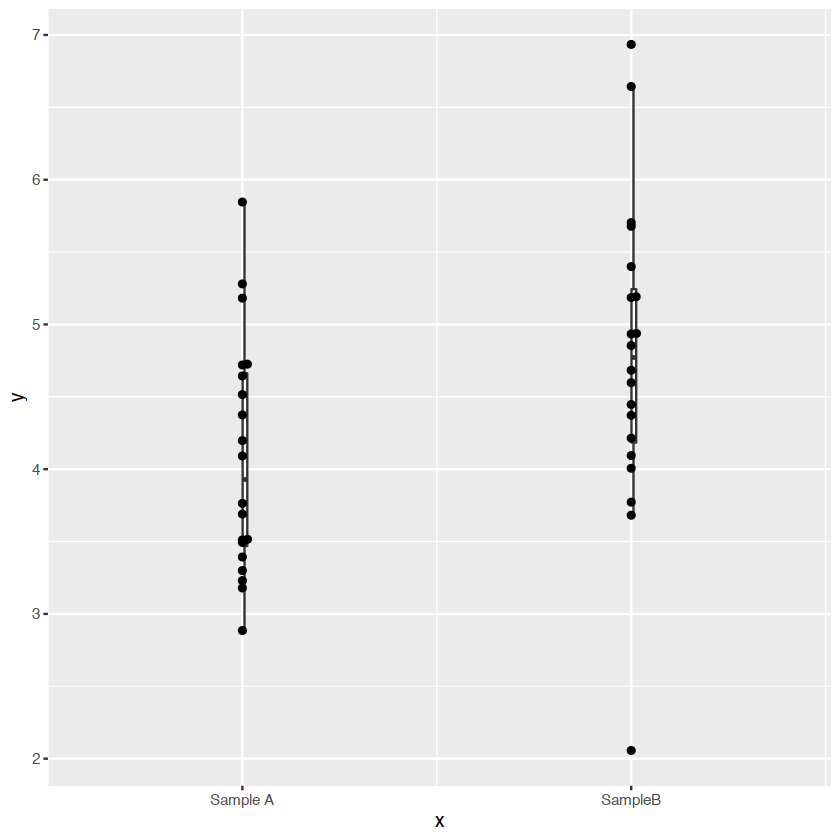

In [13]:
library(beeswarm)

# Create random data
r_norm <- data.frame(dat = c(rnorm(n = 20, mean = 4, sd = 1),
                            rnorm(n = 20, mean = 5, sd = 1)),
                    sample = c(rep("A", 20), rep("B", 20)))

# Create a swarm
r_norm_swarm <- beeswarm(dat ~ sample, 
            data = r_norm, method = 'swarm', 
            do.plot = F, pwcol = sample)[, c(1, 2, 4, 6)]
colnames(r_norm_swarm) <- c("x", "y", "colour", "sample") 

beeswarm.plot <- ggplot(r_norm_swarm, aes(x, y))
beeswarm.plot2 <- beeswarm.plot + geom_boxplot(aes(x, y,
  group = round(x, 1)), outlier.shape = NA)
beeswarm.plot3 <- beeswarm.plot2 + geom_point() +
  scale_x_continuous(breaks = c(1:2), 
         labels = c("Sample A", "SampleB"), expand = c(0, 0.5))
beeswarm.plot3

<div class="alert alert-block alert-success">
<b>Task:</b> Create a visualisation to graphically demonstrate the outcome of this *t*-test.
</div>

Now we do the same test using a convenient function that comes with the **ggpubr** package, called `compare_means()`, to perform the same *t*-test:

In [14]:
# perform t-test using `compare_means()`
# note that compare_means() takes the same arguments as t.test()
compare_means(dat ~ sample, data = r_two, method = "t.test", var.equal = TRUE)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
dat,A,B,0.05804609,0.058,0.058,ns,T-test


Note above that in order to tell `compare_means()` to perform a *t*-test we feed it the argument `method = "t.test"`. The output is similar to that of the familiar `t.test()` function that we used earlier, but the output is more abbreviated and less useful. Typically, the output of the *t*-tests that we need to report in the results sections of our papers include the $t$-statistic, the $P$-value, and the degrees of freedom, $d.f.$, and these are absent from the `compare_means()` function's output.

### One-sided two-sample *t*-tests

Just as with the one-sample *t*-tests above, we may also specify which tail of the distribution we are interested in when we compare the means of our two samples. We do so by providing the same arguments as previously:

In [38]:
# Is the mean of sample B smaller than that of sample A?
compare_means(dat ~ sample, data = r_two, method = "t.test", var.equal = TRUE, alternative = "less")

# Is the mean of sample B greater than that of sample A?
compare_means(dat ~ sample, data = r_two, method = "t.test", var.equal = TRUE, alternative = "greater")

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
dat,A,B,0.970977,0.97,0.97,ns,T-test


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
dat,A,B,0.02902304,0.029,0.029,*,T-test


What do these results show? Is this surprising?

### Two-sided two-sample *t*-tests

Again, as stated above, the default setting in R for comparisons of means is that the test is two-sided. If one wants to state this explicitly it may be done as previously. Note that the results are identical.

In [40]:
# Default settings
compare_means(dat ~ sample, data = r_two, method = "t.test")

# Explicitly state a two-sided test
compare_means(dat ~ sample, data = r_two, method = "t.test", alternative = "two.sided")

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
dat,A,B,0.05835201,0.058,0.058,ns,T-test


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
dat,A,B,0.05835201,0.058,0.058,ns,T-test


## Paired *t*-tests

Paired *t*-tests are done when comparing matched samples, and in other words, when our second assumption of *t*-tests is violated: the observations are independent of one another---in paired samples, clearly they are not independent. This test is also sometimes called a dependent sample *t*-test.

For example, we design a survey to determine if, in a group of 20 people, individuals' right arms differ in length from that of their left arms. For person A, we measure her right arm and her left arm. For person B we measure his right arm and his left arm. So we go all the way to person 20. A right arm belonging with one individual is always matched against a left arm in the same individual. The samples are paired so we use a paired *t*-test. Another example: we follow the growth of a sample of 20 piglets over three weeks to see if they weigh more after three weeks than they did at the start of the assessment period. We measure the first piglet, named Halal, at the start of the three week period and again after. We do the same for the second piglet, Kosher. And so it goes. Each piglet has a paired set of measurements, one before matched with one after. In both these examples the data in the two groups (left arm and right arm; or before and after) are not independent, so we need to account for this in the analysis. In practice, how do we perform such a *t*-test? Who can think of a dataset we've used in the past that we would use a paired *t*-test for?

In [17]:
compare_means(dat ~ sample, data = r_two, method = "t.test", paired = TRUE)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
dat,A,B,0.03913521,0.039,0.039,*,T-test


## Comparison of two population proportions

All of the tests we covered above are designed to deal with continuous data, such as fish lengths or chlorophyll content. If we want to compare proportions (probabilities of success) of different samples against each other, or some known population mean, we need `prop.test()`. Let's create a dummy dataset to get a better idea of how this function works. Below we create some data showing the result of placing two different subjects, Jack and Jill, in separate sealed rooms for two hours (120 minutes). Once every minute a mosquito is let into the room before being extracted again. The columns `yes` and `no` show if the mosquito bit the subject during that one minute. Who says science can't be fun!

In [18]:
mosquito <- matrix(c(70, 85, 50, 35), ncol = 2)
colnames(mosquito) <- c("yes", "no")
rownames(mosquito) <- c("Jack", "Jill")
mosquito

,yes,no
Jack,70,50
Jill,85,35


### One-sample and two-sample tests

As with *t*-tests, proportion tests may also be based on one sample, or two. If we have only one sample we must specify the total number of trials as well as what the expected population probability of success is. Because these are individual values, and not matrices, we will show what this would look like without using any objects but will rather give each argument within `prop.test()` a single exact value. In the arguments within `prop.test()`, `x` denotes the number of successes recorded, `n` shows the total number of individual trials performed, and `p` is the expected probability. It is easiest to consider this as though it were a series of 100 coin tosses.

In [19]:
# When the probability matches the population
prop.test(x = 45, n = 100, p = 0.5)

# When it doesn't
prop.test(x = 33, n = 100, p = 0.5)


	1-sample proportions test with continuity correction

data:  45 out of 100, null probability 0.5
X-squared = 0.81, df = 1, p-value = 0.3681
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3514281 0.5524574
sample estimates:
   p 
0.45 



	1-sample proportions test with continuity correction

data:  33 out of 100, null probability 0.5
X-squared = 10.89, df = 1, p-value = 0.0009668
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2411558 0.4320901
sample estimates:
   p 
0.33 


If we have two samples that we would like to compare against one another we enter them into the function as follows:

In [20]:
# NB: Note that the `mosquito` data are a matrix, NOT a data.frame
prop.test(mosquito)


	2-sample test for equality of proportions with continuity correction

data:  mosquito
X-squared = 3.5704, df = 1, p-value = 0.05882
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.253309811  0.003309811
sample estimates:
   prop 1    prop 2 
0.5833333 0.7083333 


Do mosquito's bite Jack and Jill at different proportions?

### One-sided and two-sided tests

AS with all other tests that compare values, proportion tests may be specified as either one or two-sided. Just to be clear, the default setting for `prop.test()`, like everything else, is a two-sided test. See code below to confirm that the results are identical with or without the added argument:

In [21]:
# Default
prop.test(mosquito)

# Explicitly state two-sided test
prop.test(mosquito, alternative = "two.sided")


	2-sample test for equality of proportions with continuity correction

data:  mosquito
X-squared = 3.5704, df = 1, p-value = 0.05882
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.253309811  0.003309811
sample estimates:
   prop 1    prop 2 
0.5833333 0.7083333 



	2-sample test for equality of proportions with continuity correction

data:  mosquito
X-squared = 3.5704, df = 1, p-value = 0.05882
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.253309811  0.003309811
sample estimates:
   prop 1    prop 2 
0.5833333 0.7083333 


Should we want to specify only one of the tails to be considered, we do so precisely the same as with *t*-tests. Below are examples of what this code would look like:

In [22]:
# Jack is bit less than Jill
prop.test(mosquito, alternative = "less")

# Jack is bit more than Jill
prop.test(mosquito, alternative = "greater")


	2-sample test for equality of proportions with continuity correction

data:  mosquito
X-squared = 3.5704, df = 1, p-value = 0.02941
alternative hypothesis: less
95 percent confidence interval:
 -1.00000000 -0.01597923
sample estimates:
   prop 1    prop 2 
0.5833333 0.7083333 



	2-sample test for equality of proportions with continuity correction

data:  mosquito
X-squared = 3.5704, df = 1, p-value = 0.9706
alternative hypothesis: greater
95 percent confidence interval:
 -0.2340208  1.0000000
sample estimates:
   prop 1    prop 2 
0.5833333 0.7083333 


Do these results differ from the two-sided test? What is different?

## A *t*-test workflow

Now that we have seen how to compare the means of two sample sets of data, let's see what that complete workflow would look like in R. For this example we will use the `ecklonia` data from [Intro R Workshop: Data Manipulation, Analysis and Graphing](https://robwschlegel.github.io/Intro_R_Workshop/).

### Loading data

Before we can run any analyses we will need to load our data. We are also going to convert these data from their wide format into a long format because this is more useful for the rest of our workflow.

In [24]:
ecklonia <- read.csv("../data/ecklonia.csv") %>% 
  gather(key = "variable", value = "value", -species, -site, -ID)

### Visualising data

With our data loaded, let's visualise them in order to ensure that these are indeed the data we are after. Visualising the data will also help us to formulate a hypothesis.

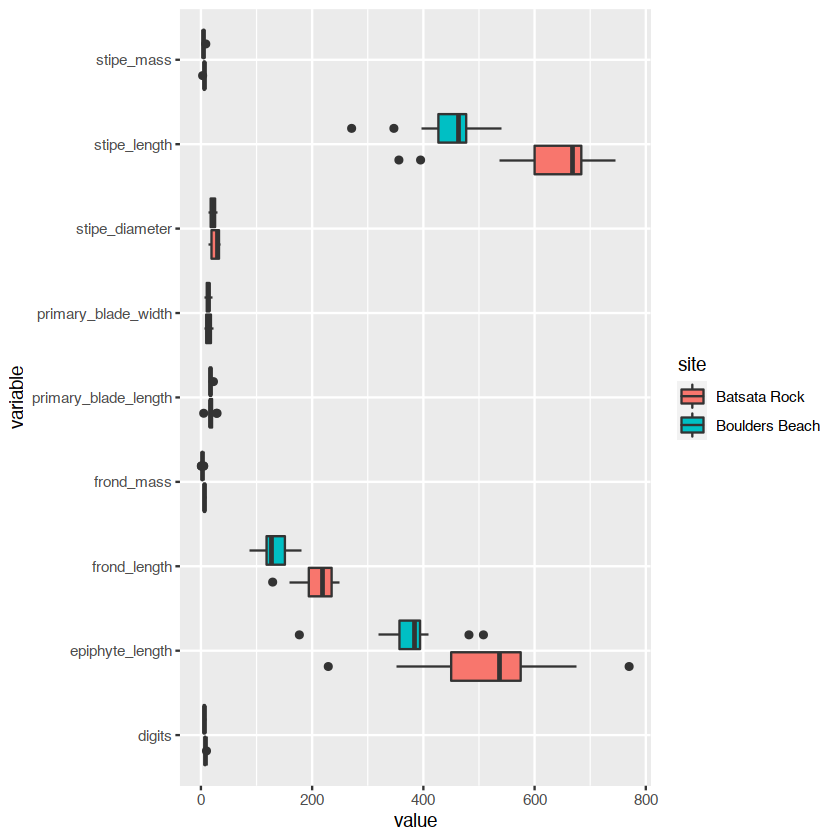

In [27]:
ggplot(data = ecklonia, aes(x = variable, y = value, fill = site)) +
  geom_boxplot() +
  coord_flip()

**Figure:** Boxplots showing differences in morphometric properties of the kelp _Ecklonia maxima_ at two sites in False Bay.

The first thing we should notice from the figure above is that our different measurements are on very different scales. This makes comparing all of our data visually rather challenging. Even given this complication, one should readily be able to make out that the measurement values at Batsata Rock appear to be greater than at Boulders Beach. Within the framework of the scientific process, that is what we would call an "observation", and is the first step towards formulating a hypothesis. The next step is to refine our observation into a hypothesis. By what measurement are the kelps greater at one site than the other?

### Formulating a hypothesis

Looking at the figure above it appears that for almost all measurements of length, Batsata Rock far exceeds that of Boulders Beach however, the stipe masses between the two sites appear to be more similar. Let's pull out just this variable and create a new boxplot.

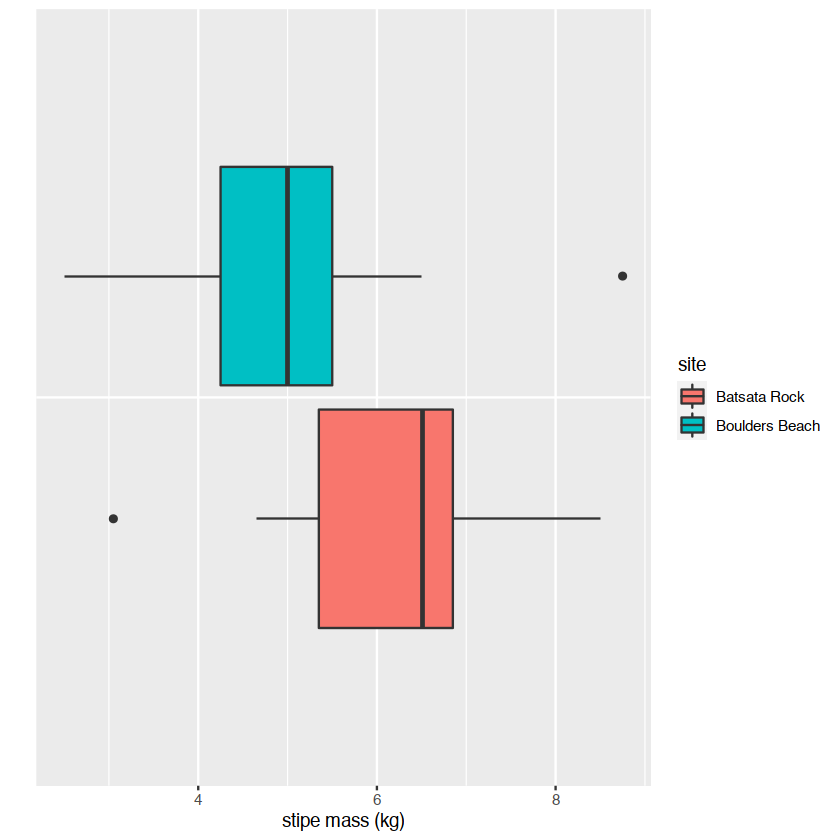

In [31]:
# Filter the data
ecklonia_sub <- ecklonia %>% 
  filter(variable == "stipe_mass")

# Then create a new figure
ggplot(data = ecklonia_sub, aes(x = variable, y = value, fill = site)) +
  geom_boxplot() +
  coord_flip() +
  labs(y = "stipe mass (kg)", x = "") +
  theme(axis.text.y = element_blank(),
        axis.ticks.y = element_blank())

**Figure:** Boxplots showing the difference in stipe mass (kg) of the kelp _Ecklonia maxima_ at two sites in False Bay.

Now we have a more interesting comparison at hand. The question I think of when I look at these data is "Are the stipe masses at Batsata Rock greater than at Boulders Beach?". The hypothesis necessary to answer this question would look like this:

-   H0: Stipe mass at Batsata Rock **is not** greater than at Boulders Beach.
-   H1: Stipe mass at Batsata Rock **is** greater than at Boulders Beach.

Or more formally:

-   $H_{0}: \bar{A} \leq \bar{B}$
-   $H_{a}: \bar{A} > \bar{B}$.

Which test must we use for this hypothesis?

### Choosing a test

Before we can pick the correct statistical test for our hypothesis, we need to be clear on what it is we are asking. Starting with the data being used is usually a good first step. As we may see in the above figure, we have two sample sets that we are comparing. Therefore, unsurprisingly, we will likely be using a *t*-test. But we're not done yet. How is it that we are comparing these two sample sets? Remember from the examples above that there are multiple different ways to compare two sets of data. For our hypothesis we want to see if the stipe mass at Batsata Rock is **greater than** the stipe mass at Boulders Beach, not just that they are different. Because of this we will need a one-sided *t*-test. But wait, there's more! We've zeroed in on which sort of test would be appropriate for our hypothesis, but before we run it we need to check our assumptions.

### Checking assumptions

In case we forgot, here are the assumptions for a *t*-test:

-   the dependent variable must be continuous (i.e. it is measured at the interval or ratio level),
-   the observations in the groups being compared are independent of each other,
-   the data are **normally distributed**, and
-   that the data are **homoscedastic**, and in particular, that there are no outliers.

We know that the first two assumptions are met because our data are measurements of mass at two different sites. Before we can run our one-sided *t*-test we must meet the last two assumptions. Lucky us, we have a function tat will do that automagically.

In [29]:
ecklonia_sub %>% 
  group_by(site) %>% 
  summarise(stipe_mass_var = two_assum(value)[1],
            stipe_mass_norm = two_assum(value)[2])

site,stipe_mass_var,stipe_mass_norm
<chr>,<dbl>,<dbl>
Batsata Rock,1.999142,0.8130260
Boulders Beach,2.643942,0.5271518


Lovely. On to the next step.

### Running an analysis

With our assumptions checked, we may now analyse our data. We'll see below how to do this with both of the functions we've learned in this chapter for comparing means of two sample sets.

In [41]:
# Traditional output
t.test(value ~ site, data = ecklonia_sub, var.equal = TRUE, alternative = "greater")

# Dataframe output
compare_means(value ~ site, data = ecklonia_sub, method = "t.test", var.equal = TRUE, alternative = "greater")


	Two Sample t-test

data:  value by site
t = 1.8741, df = 24, p-value = 0.03657
alternative hypothesis: true difference in means between group Batsata Rock and group Boulders Beach is greater than 0
95 percent confidence interval:
 0.09752735        Inf
sample estimates:
  mean in group Batsata Rock mean in group Boulders Beach 
                    6.116154                     4.996154 


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
value,Boulders Beach,Batsata Rock,0.03657268,0.037,0.037,*,T-test


### Interpreting the results

We may reject the null hypothesis that the stipe mass of kelps at Batsata Rock are not greater than at Boulders Beach if our *t*-test returns a *p*-value $\leq$ 0.05. We must also pay attention to some of the other results from our *t*-test, specifically the *t*-value (t) and the degrees of freedom (df) as these are also needed when we are writing up our results. From all of the information above, we may accept the alternative hypothesis. But how do we write that up?

### Drawing conclusions

There are many ways to present ones findings. Style, without *too much* flourish, is encouraged as long as certain necessary pieces of information are provided. The sentence below is a very minimalist example of how one may conclude this mini research project. A more thorough explanation would be desirable.

> The stipe mass (kg) of the kelp *Ecklonia maxima* was found to be significantly greater at Batsata Rock than at Boulders Beach (*p* = 0.03, *t* = 1.87, df = 24).

### Going further

But why though? As is often the case in life, and science is no exception, answers to our questions just create even more questions! Why would the mass of kelp stipes at one locations in the same body of water and only a kilometre or so apart be significantly different? It looks like we are going to need to design a new experiment... Masters thesis anyone?

## Exercises

<div class="alert alert-block alert-success">
<b>Exercise 1:</b> Find or create your own normally distributed data and think of a hypothesis you could use a t-test for. Write out the hypothesis, test it, and write a one sentence conclusion for it. Provide all of the code used to accomplish this.
</div>
    
<div class="alert alert-block alert-success">
<b>Exercise 2:</b> Do the same as Exercise 1, but for probability data.
</div>